<div dir="rtl">
פרוייקט גמר
   

<div dir="rtl">
מילכה כהן זרדי 212015002

<div dir="rtl">
מוריה עזרא כהנא 322871302

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.discrete.discrete_model import NegativeBinomial
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

<div dir="rtl">

## ברוכים הבאים לפרויקט מסכם. 
    
### בפרויקט זה ננתח חברת כימיקלים. בחברה יש שני סוגים של כימיקלים שעובדים איתם: Sulfuric_Acid ו - Methane. 
    
### ישנם עובדים בחברה וכל עובד מיומן בסוג אחד של כימיקל ולכן הוא עובד רק איתו. 
    
### כמו בכל בחברה - גם כאן יש תאונות עבודה המתבצעות על ידי העובדים. והפרויקט יתמקד באותן תאונות. 
    
### החברה ממוקמת בקנדה ויש לה מפעלים המפוזרים ברחבי המדינה.
    
### בנוסף, כל עובד עובר מבחני בטיחות ומקבל עליהם ציון - מספר בין 1 ל 10. כאשר 10 הכי גבוה. 
        
## Dataset חלק א':
    
### כאמור במפעל ישנם חומרים כימיים: 'Methane' ו 'Sulfuric Acid'
    
### לעיתים אחרי שימוש באחד החומרים נשאר שאריות של החומר וקשה להבחין איזה חומר זה בין השניים. 
    
### מה שכן אנחנו יודעים זה את הטמפרטורה של החומר והאם התגבשו גושים בחומר או לא. שתי תכונות אלו יכולות להעיד על סוג החומר. 
    
### בdataset יש את העמודות הבאות: 
    

### Intercept: simply a column of ones to add intercept to the model
### temp: the temperture of the chimical
### rigid_left__c: Categorial  - true if there are some lumps. 
### is_mathane: True if mathane, False if Sulfuric Acid

<div dir="rtl">

## חלק א:
    

    
### 1. נא לבנות מודל רגרסיה לוגיסטית שחוזה את ההסתברות שהחומר הוא mathane.  יש להציג את המשוואה הסופית לתחזית.
    
### כעת נרצה לסווג האם חומר הוא  'Methane' או 'Sulfuric Acid'
### לשם אחידות - נגדיר שMethane  הוא 1 ואילו Sulfuric Acid הוא 0
    
### 2. האם קיים ערך סף לסיווג כך שהsensativity וגם הspecaficity מעל 0.6? אם כן, מהו תחום ערכי הסף המקיימים זאת?
    
### 3.   מהו הthreshold שממקסם את הaccuracy? אם יש יותר מאחד נא לפרט את התחום
    
### מה ההסתברות שהחומר הוא methane בשלושת המקרים הבאים: 
    
### א. טמפרטורה 25.5 ונשאר שאריות
    
### ב. טמפרטורה 26.5 ונשאר שאריות
    
### ג. טמפרטורה 27.5 ונשאר שאריות
    
### 4.  מהו הlog odd ratio בין ב' לא' ובין ג' לב' ובין ג' לא'? 
    
### האם שלוש הערכים שקיבלתם שווים? האם חלקם שווים? נא הסבר.י את משמעות התוצאה שקיבלתם.

In [2]:
num_group = 6
df_part_1 = pkl.load(open("../data_project_semester_b/project_part_1_group_"+str(num_group)+'.pkl', 'rb'))
df_part_1.head()

,Intercept,temp,rigid_left__c,is_mathane
0,1.0,14.630013,False,True
1,1.0,46.244239,True,False
2,1.0,15.363215,True,False
3,1.0,10.018814,False,True
4,1.0,28.097239,False,True


In [3]:
df_part_1.shape

(120, 4)

In [4]:
df_part_1.isna().sum()

Intercept        0
temp             0
rigid_left__c    0
is_mathane       0
dtype: int64

### 1

In [5]:
df = pd.DataFrame(df_part_1)
df['rigid_left__c'] = df['rigid_left__c'].astype(int)
df['is_mathane'] = df['is_mathane'].astype(int)
df.head()

,Intercept,temp,rigid_left__c,is_mathane
0,1.0,14.630013,0,1
1,1.0,46.244239,1,0
2,1.0,15.363215,1,0
3,1.0,10.018814,0,1
4,1.0,28.097239,0,1


In [6]:
x = df[['Intercept', 'temp', 'rigid_left__c']]
y = df['is_mathane']
logistic_model = sm.Logit(y,x)
model = logistic_model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.494686
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_mathane   No. Observations:                  120
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                            2
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.2811
Time:                        20:17:05   Log-Likelihood:                -59.362
converged:                       True   LL-Null:                       -82.577
Covariance Type:            nonrobust   LLR p-value:                 8.282e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9987      0.757      3.959      0.000       1.514       4.483
temp             -0.

#### Probability(is_mathane) = 1 / (1 + exp(-(2.9987 + (-0.0479) * temp + (-2.7380) * rigid_left__c)))

### 2

In [7]:
data_predict_model_1= df[['Intercept', 'temp', 'rigid_left__c']]
data_predict_model_1

,Intercept,temp,rigid_left__c
0,1.0,14.630013,0
1,1.0,46.244239,1
2,1.0,15.363215,1
3,1.0,10.018814,0
4,1.0,28.097239,0
...,...,...,...
115,1.0,40.048827,1
116,1.0,46.713829,0
117,1.0,39.151538,1
118,1.0,25.095075,0


In [8]:
df['prob_preds'] = model.predict(df[['Intercept', 'temp', 'rigid_left__c']])
df.head()

,Intercept,temp,rigid_left__c,is_mathane,prob_preds
0,1.0,14.630013,0,1,0.908730
1,1.0,46.244239,1,0,0.124182
2,1.0,15.363215,1,0,0.383452
3,1.0,10.018814,0,1,0.925463
4,1.0,28.097239,0,1,0.839358


In [9]:
df['classification'] = df['prob_preds'].apply(lambda x: 1 if x > 0.6  else 0)
df.head()

,Intercept,temp,rigid_left__c,is_mathane,prob_preds,classification
0,1.0,14.630013,0,1,0.908730,1
1,1.0,46.244239,1,0,0.124182,0
2,1.0,15.363215,1,0,0.383452,0
3,1.0,10.018814,0,1,0.925463,1
4,1.0,28.097239,0,1,0.839358,1


In [10]:
TP = df.loc[(df['is_mathane']==1)&(df['classification']==1), :].shape[0]
FP = df.loc[(df['is_mathane']==0)&(df['classification']==1), :].shape[0]
TN = df.loc[(df['is_mathane']==0)&(df['classification']==0), :].shape[0]
FN = df.loc[(df['is_mathane']==1)&(df['classification']==0), :].shape[0]

TP, FP, TN, FN

(52, 12, 42, 14)

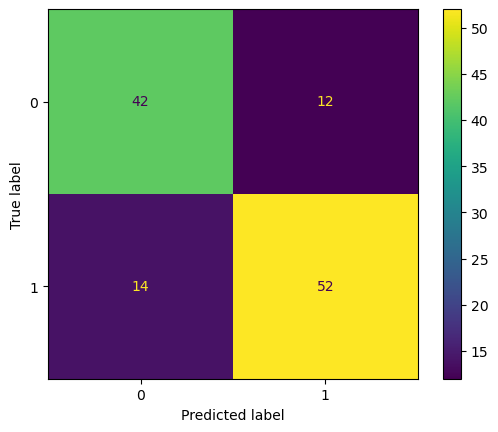

In [11]:
cm = confusion_matrix(df['is_mathane'], df['classification'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.array([0,1]))
disp.plot()

#### Sensitivity

In [12]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.7878787878787878

#### Specificity

In [13]:
cm[0,0]/(cm[0,0]+cm[0,1])

0.7777777777777778

In [14]:
## בדיקת ערכי סף לדוגמא
threshold = 0.4

df['classification'] = df['prob_preds'].apply(lambda x: 1 if x > threshold else 0)

y_pred = df['classification']
y = df['is_mathane']
confusion_matrix_ = confusion_matrix(y, y_pred)

sensitivity_ = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
specificty_ = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
fpr = 1- specificty_

sensitivity_, fpr

(0.8181818181818182, 0.2777777777777778)

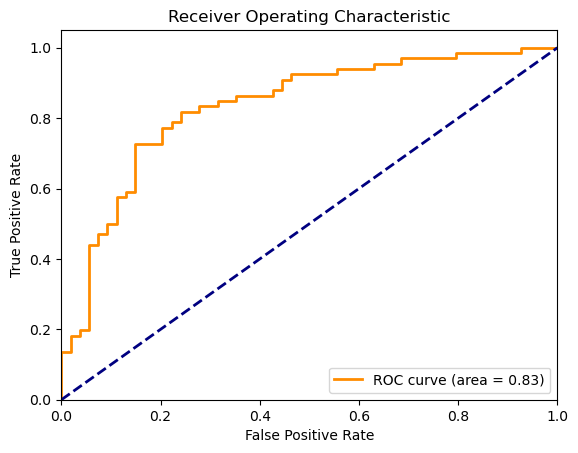

In [15]:
y_true = df['is_mathane']
y_scores = df['prob_preds']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
thresholds_range = thresholds[(tpr > 0.6) & ((1 - fpr) > 0.6)]
print("Range of thresholds that satisfy both conditions:", thresholds_range.min(), "-", thresholds_range.max())

Range of thresholds that satisfy both conditions: 0.36374875315459987 - 0.7089343236399959


### 3

#### accuracy

In [17]:
accuracies = []

for threshold in thresholds:
    predictions = (df['prob_preds'] >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(df['is_mathane'], predictions).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    accuracies.append(accuracy)

max_accuracy = max(accuracies)
best_threshold = thresholds[accuracies.index(max_accuracy)]

print(f"Thresholds that maximize accuracy: {best_threshold}")
print(f"Maximum accuracy: {max_accuracy:.4f}")


Thresholds that maximize accuracy: 0.42988997447232896
Maximum accuracy: 0.7917


### A 4

In [18]:
date_a=pd.DataFrame({"Intercep":[1],"rigid_left__c":[1],"temp":[25.5]})
date_a

,Intercep,rigid_left__c,temp
0,1,1,25.5


In [19]:
predict_a = model.predict(date_a)
predict_a.values[0]

9.098299054191164e-30

In [20]:
predict_odds_a=predict_a/(1-predict_a)

### B 4

In [21]:
date_b=pd.DataFrame({"Intercep":[1],"rigid_left__c":[1],"temp":[26.5]})
date_b

,Intercep,rigid_left__c,temp
0,1,1,26.5


In [22]:
predict_b = model.predict(date_b)
predict_b.values[0]

5.886274152506468e-31

In [23]:
predict_odds_b=predict_b/(1-predict_b)

### C 4

In [24]:
date_c=pd.DataFrame({"Intercep":[1],"rigid_left__c":[1],"temp":[27.5]})
date_c

,Intercep,rigid_left__c,temp
0,1,1,27.5


In [25]:
predict_c = model.predict(date_c)
predict_c.values[0]

3.8082088962007586e-32

In [26]:
predict_odds_c=predict_c/(1-predict_c)

## log odd ratio

In [27]:
np.log(predict_odds_b/predict_odds_a)

0   -2.738049
dtype: float64

In [28]:
np.log(predict_odds_c/predict_odds_b)

0   -2.738049
dtype: float64

In [29]:
np.log(predict_odds_c/predict_odds_a)

0   -5.476099
dtype: float64

 <div dir="rtl">
    ה-Log Odds Ratio בין המקרים 2 ו-1 שווה  ל-Log Odds Ratio בין המקרים 3 ו-2. המשמעות היא שהשינוי בטמפרטורה משפיע באופן עקבי על הסיכוי שהחומר הוא Methane.
ה-Log Odds Ratio בין המקרים 3 ו-1 הוא פשוט הסכום של שני ה-Log Odds Ratios האחרים, מכיוון שהשינוי בטמפרטורה בין 3 ו-1 הוא בדיוק כפול מהשינוי בין 2 ו-1 או בין 3 ו-2.
<div dir="rtl">
ההסתברויות נמוכות באופן יחסי, כלומר ככל שהטמפרטורה עולה, יש סיכוי נמוך יותר שהחומר הוא Methane.
<div dir="rtl">
מסקנה-
התוצאות מראות שגידול בטמפרטורה גורם לירידה בהסתברות שהחומר הוא Methane.
היחסים (Log Odds Ratios) שווים , מה שמעיד על שינוי עקבי ואחיד בהסתברות ביחס לשינוי בטמפרטורה.
ככל שהטמפרטורה עולה, הסיכוי שהחומר הוא Methane פוחת, וההשפעה היא עקבית על פני כל עלייה של 1 מעלה.

<div dir="rtl">

## חלק ב:
    
### להלן dataset עבור חלק ב'
        
### כל שורה בעצם נותנת לנו נתונים לכמה זמן עובד נמצא בחברה, איזה סוג כימיקל הוא עובד איתו, את גיל העובד מיקום המפעל  ציוני במחבני בטיחות וכמות התאונות שהיו לו במשך שנותיו במפעל.

### Intercept: simply a column of ones to add intercept to the model
### age: the worker's age
### safety_guidence_score: the score of safety test a worker is taking - can be any number between 0 to 10
### factory__c: categorial variabal which indicate the factory
### chemical__c: there are two chemicals in which workers are working with: Methane and Sulfuric_Acid
### time_in_factory: the number of years the worker in the factory
### num_accident: the total nnumber of accidents the worker had during his time in the factory


<div dir="rtl">

    
### להלן מספר מטלות:
     
### 1. נא להציג bar chart של המשתנה הקטגוריאלי factory__c כאשר נרצה להציג מספר תאונות בממוצע לשנת עבודה עבור כל מפעל. 
    
### האם לפי התוצאות שקיבלתם נראה כי משתנה זה יהיה מובהק וייכנס למודל?    נמק.י
   
### 2. נא להציג גרף שמראה את מספר התאונות לשנה בודדת כפונקציה של הגיל. כל גיל נמצא הרבה פעמים בdataset אז יש לעשות איחוד של כל הנתונים עבור כל גיל.  האם נראה שיש קשר בין השניים? אם כן, מה הסימן של המקדם של הגיל יהיה במשוואת רגרסיה? 
        
### 3. יש כעת לעשות רגרסיה פואסונית כולל למודל ולבסוף להציג את המשוואה הסופית
### הערה: במשתנים הקטגוריאלים יש להזין את טורונטו וmethane כמשתני בסיס למודל. 
    
### 4. האם רגרסיה פואוסנית מתאימה כאן? נמק.י יש לבדוק - 4 דרכים שונות 

### 5. באחת הבדיקות להנחות המודל נרצה להראות שכ95 אחוז מהשגיאות הם +- 2 סטיות תקן. למה בדיקה זו עוזרת להבין את הנחות המודל? מה בדיוק אנחנו מניחים שאנחנו עושים רגרסיה פואסונית?
    
### 6. בבדיקה של הנחת המודל שהתוחלת שווה לשונות אנחנו מחלקים את הנתונים לbuckets ובודקים בכל אחד שזה מתקיים, מדוע? למה לא פשוט לחשב את השונות והתוחלת של המשתנה המוסבר בdataset ולראות האם שווים?
    
### 7. אם בסעיף 4 התשובה הייתה לא, נא לעשות רגרסיה בינומית שלילית ולבדוק אם היא מתאימה כאן.
###  אם בסעיף 7 התשובה הייתה כן נא לחשב את הIRR של אחד המשתנים הרציפים ולהסביר מה המשמעות שלו במונחים של מספר תאונות

### 8. לפי משוואת רגרסיה שקיבלתם, מהו מספר התאונות הצפוי לעובד בן 30 שקיבלת 8 במבחן בטיחות עבור 3 שנים עבודה במפעל. לגבי משתנים קטגוריאלים תשתמשו רק בקטגוריות בסיס. 
    
### 9. מה המשמעות של התוצאה שקיבלתם? מה המספר הזה מייצג בדיוק?  
 
    
### 10. predictions:    נא  להציג גרף תלת מימדי של מספר תאונות עבור פרק זמן של 5 שנים, במפעל בטורונטו עבור החומר Methane, כפונקציה של הגיל ותוצאת בחינה בטיחות. 

### 11. שאלה תיאורטית: מה ההבדל בין רגרסיה פואסונית לרגרסיה ליניארית מבחינת מציאת ערכי הפרמטרים? במה רגרסיה ליניארית עדיפה בהיבט  הזה? 
    


In [30]:
num_group = 6
df_part_2= pkl.load(open("../data_project_semester_b/project_part_2_group_"+str(num_group)+'.pkl', 'rb'))
df_part_2.head()

,Intercept,age,safety_guidence_score,factory__c,chemical__c,time_in_factory,num_accidents
0,1.0,25,8,Vancouver,Sulfuric_Acid,1,0
1,1.0,48,1,Toronto,Methane,5,6
2,1.0,41,7,Vancouver,Methane,2,0
3,1.0,41,8,Calgery,Sulfuric_Acid,5,4
4,1.0,28,6,Saskatoon,Sulfuric_Acid,4,10


### 1

In [31]:
df_part_2['avg_accidents_per_year'] = df_part_2['num_accidents'] / df_part_2['time_in_factory']
factory_avg_accidents = df_part_2.groupby('factory__c')['avg_accidents_per_year'].sum().reset_index()

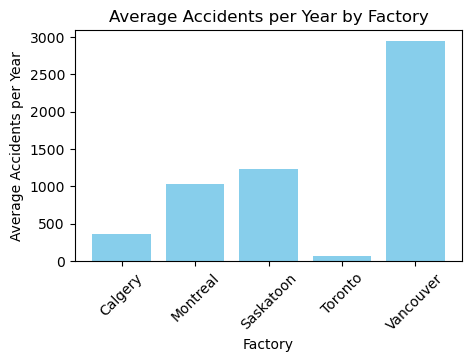

In [32]:
plt.figure(figsize=(5, 3))
plt.bar(factory_avg_accidents['factory__c'], factory_avg_accidents['avg_accidents_per_year'], color='skyblue')
plt.xlabel('Factory')
plt.ylabel('Average Accidents per Year')
plt.title('Average Accidents per Year by Factory')
plt.xticks(rotation=45)
plt.show()

 <div dir="rtl">
המשתנה שמכניסים למודל הוא שם המפעל "factory__c". 
    הסיבה לכך היא שבגרף נצפו הבדלים משמעותיים במספר התאונות הממוצע לשנה בין המפעלים השונים. הבדלים אלו מצביעים על כך שלמיקום שבו עובד האדם עשויה להיות השפעה על הסיכוי שלו להיות מעורב בתאונה. ולכן משתנה זה ייחשב חשוב וייכנס למודל, כיוון שהוא תורם להבנה טובה יותר של הקשר בין מספר התאונות בין העובדים במפעלים השונים.

### 2

In [33]:
age_avg_accidents = df_part_2.groupby('age')['avg_accidents_per_year'].mean()

In [34]:
X = age_avg_accidents.index.to_series()
y = age_avg_accidents.values
X = sm.add_constant(X)
linear_model = sm.OLS(y, X).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     52.60
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.34e-07
Time:                        20:17:12   Log-Likelihood:                 43.979
No. Observations:                  27   AIC:                            -83.96
Df Residuals:                      25   BIC:                            -81.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8831      0.045     19.672      0.0

 <div dir="rtl">
כל המשתנים מובהקים סטטיסטית ברמת המובהקות שקטנה מ 0.05 ולכן נוכל להמשיך עם המודל ללא שינויים נוספים

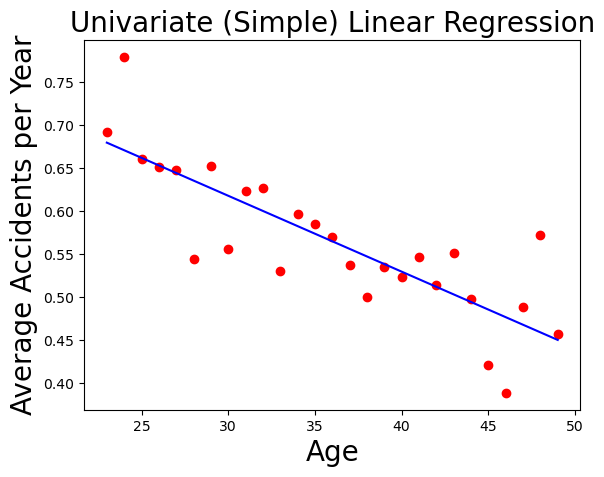

In [35]:
X = pd.Series(age_avg_accidents.index)
y = age_avg_accidents.values


X = X.values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)


x_vals = X.flatten()  
y_vals = y

plt.figure()

plt.scatter(x_vals, y_vals, color='r') 

plt.plot(x_vals, reg.predict(X), color='blue') 

plt.xlabel('Age', fontsize=20)
plt.ylabel('Average Accidents per Year', fontsize=20)
plt.title('Univariate (Simple) Linear Regression', fontsize=20)

plt.show()

 <div dir="rtl">
בהתבסס על התוצאות של מודל הרגרסיה הלינארית, נראה שיש קשר בין הגיל למספר התאונות לשנה. הסימן של המקדם של הגיל הוא שלילי, מה שמעיד על כך שממוצע מספר התאונות לשנה קטן ככל שהגיל גדל.

### 3

In [36]:
df_part_2_dg = pd.get_dummies(df_part_2, columns=['factory__c', 'chemical__c'], drop_first=False)

In [37]:
X = df_part_2_dg[["Intercept", 'age', 'safety_guidence_score', 'factory__c_Montreal', 'factory__c_Vancouver', "factory__c_Calgery", 'chemical__c_Sulfuric_Acid']]
y = df_part_2_dg['num_accidents']

X = sm.add_constant(X)

poisson_model = sm.GLM(y, X, family=sm.families.Poisson(), offset=df_part_2_dg['time_in_factory']).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9993
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67282.
Date:                Tue, 20 Aug 2024   Deviance:                   1.1314e+05
Time:                        20:17:14   Pearson chi2:                 3.14e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1561
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

 <div dir="rtl">
כל המשתנים מובהקים סטטיסטית ברמת המובהקות שקטנה מ 0.05 ולכן נוכל להמשיך עם המודל ללא שינויים נוספים

log(λ) = -6.0176 -0.0192 * age + 0.0096 * safety_guidence_score -0.4248 * factory__c_Montreal -0.4736 * factory__c_Vancouver -0.5196* factory__c_Calgery -0.0378 * chemical__c_Sulfuric_Acid

### 4

### מבחן 1: תוחלת שווה לשונות 

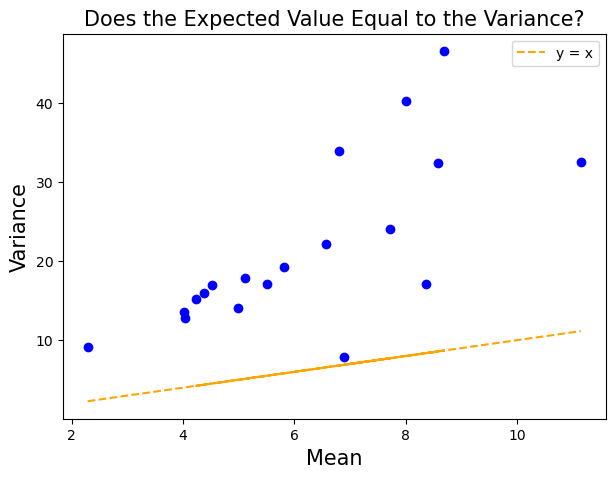

In [38]:
df_part_2_dg['predictions'] = poisson_model.fittedvalues

lams = np.linspace(0, df_part_2_dg['predictions'].max(), 20)

means = []
vars_ = []

for lams_ind in range(lams.shape[0] - 1):
    lb = lams[lams_ind]
    ub = lams[lams_ind + 1]

    
    filtered_data = df_part_2[(df_part_2_dg['predictions'] > lb) & (df_part_2_dg['predictions'] <= ub)]
    shape = filtered_data.shape
    var = filtered_data['num_accidents'].std() ** 2
    mean = filtered_data['num_accidents'].mean()

    if shape[0] > 5:  
        means.append(mean)
        vars_.append(var)


plt.figure(figsize=(7, 5))
plt.scatter(means, vars_, color='blue')
plt.plot(means, means, '--', label='y = x', color='orange')
plt.xlabel('Mean', fontsize=15)
plt.ylabel('Variance', fontsize=15)
plt.title('Does the Expected Value Equal to the Variance?', fontsize=15)
plt.legend()
plt.show()

 <div dir="rtl">
ניתן לראות כי השונות לא שווה לתוחלת ולכן המבחן לא מתקיים

### מבחן 2: שאריות בטווח 2 סטיות תקן

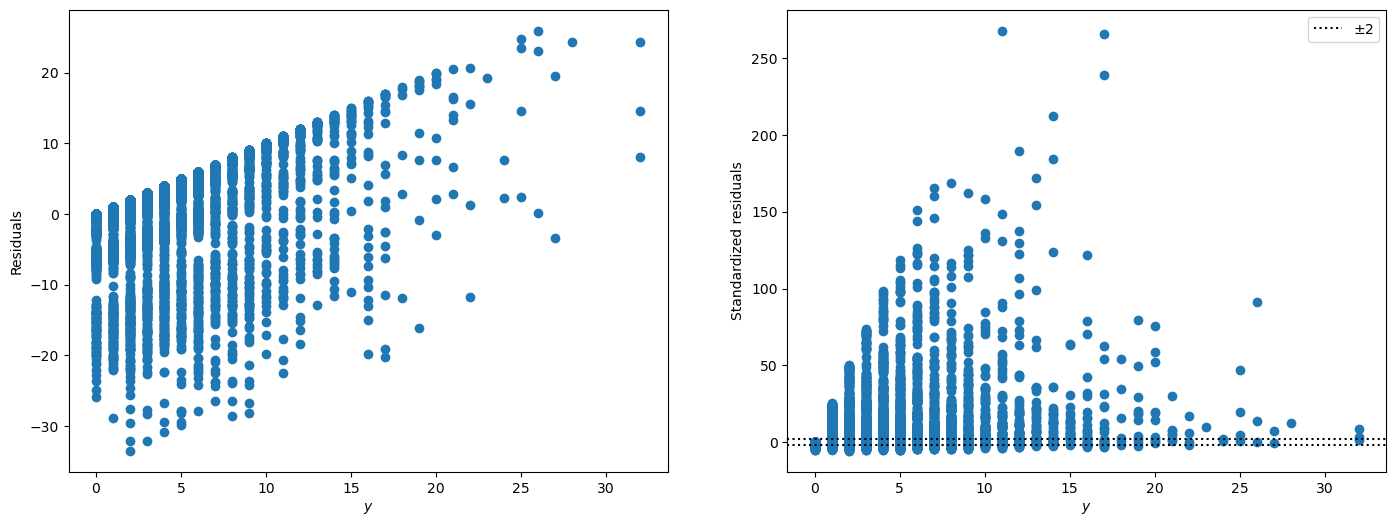

In [39]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(df_part_2_dg['num_accidents'], poisson_model.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(df_part_2_dg['num_accidents'], poisson_model.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [40]:
re = np.array(poisson_model.resid_pearson)
(re<-2).sum() , (re>2).sum()

(1098, 4141)

In [41]:
re.shape[0]

10000

In [42]:
(1098+4141)/10000

0.5239

In [43]:
1-0.5239

0.47609999999999997

  <div dir="rtl">
 ניתן לראות כי השאריות חורגות מטווח ה-2 סטיות תקן, מה שמעיד על כך שהמודל אינו מתאים לנתונים

### מבחן 3: אר קרוב ל1

In [44]:
poisson_model.pearson_chi2
poisson_model.df_resid

R = poisson_model.pearson_chi2/poisson_model.df_resid
print(R) 

313.90758572623065


 <div dir="rtl">
ניתן לראות כי אר רחוק מ1 ולכן המבחן לא מתקיים

### P-value - מבחן 4: מבחן השערות

###### H0 : שגיאות מתפלגות פואסונית - 
###### H1 : שגיאות לא מתפלגות פואסונית


In [45]:
from scipy.stats import chi2

df2 = poisson_model.df_resid
p_value = 1 - chi2.cdf(poisson_model.pearson_chi2, df2)

print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 0.0


 <div dir="rtl">
מכיון שגילינו שאנו דוחים את השערת הבסיס אז בעצם השגיאות לא מתפלגות פואסונית

 <div dir="rtl">
 מכיוון שדחינו את כל ארבעת המבחנים רגרסיה פואסונית לא מתאימה כאן

### 5

 <div dir="rtl">
הבדיקה שמראה שכ-95% מהשגיאות נמצאות בטווח של ±2 סטיות תקן עוזרת לוודא שהמודל מתפקד כמו שצריך. היא מראה שהשגיאות מתפלגות באופן אחיד סביב האפס ואין בהן דפוסים בעייתיים. זה אומר שהמודל מתאים לנתונים. בנוסף, ברגרסיה פואסונית אנחנו מניחים שהשונות שווה לממוצע ושאין בעיות של שונות יתר או חסר. אם הבדיקה מראה שהשגיאות בתוך הטווח הצפוי, זה מחזק את ההנחה שהמודל נכון ונותן תחזיות מדויקות.








### 6

 <div dir="rtl">
בדיקה כוללת של התוחלת והשונות ברגרסיה פואסונית אינה מספקת תמונה מדויקת של התאמת המודל במיוחד כשיש נתונים שונים אחד מהשני עם תצפיות רחבות וקיצוניות 
חלוקה לתתי קבוצות מצמצמת את ההשפעה של תצפיות קיצון על ידי בדיקה בקבוצות קטנות יותר, מה שמאפשר תמונה מדויקת יותר של ההתפלגות וגם מסייעת בזיהוי אי התאמות בין התוחלת לשונות בקבוצות שונות.
חלוקה לפי קבוצות חשובה להבטחה שהמודל מתאר היטב את התנהגות הנתונים בכל תת-קבוצה, וכך משפרת את דיוק התחזיות והבנת הנתונים

### 7

In [46]:
X = df_part_2_dg[['Intercept', 'age', 'safety_guidence_score', 'factory__c_Calgery', 'factory__c_Montreal', 'factory__c_Saskatoon', 'factory__c_Vancouver', 'chemical__c_Sulfuric_Acid']]
y = df_part_2_dg['num_accidents']
nb = NegativeBinomial( y, X, offset=np.log(df_part_2_dg["time_in_factory"].values),
)
result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

         Current function value: 2.112682
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43
0    0.772338
Name: alpha, dtype: float64


C:\Users\igalc\anaconda2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
alpha = 0.772338
model_NB = sm.GLM( y, X, offset=np.log(df_part_2_dg["time_in_factory"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)
result_NB = model_NB.fit()
print(result_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21127.
Date:                Tue, 20 Aug 2024   Deviance:                       11175.
Time:                        20:17:20   Pearson chi2:                 1.28e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04364
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

 <div dir="rtl">
 יצאו משתנים לא מובהקים ולכן אנחנו מוצאים אותם מהמודל

In [48]:
X = df_part_2_dg[['Intercept','age', 'safety_guidence_score', 'factory__c_Calgery','factory__c_Montreal','factory__c_Vancouver']]
y = df_part_2_dg['num_accidents']
nb = NegativeBinomial( y, X,offset=np.log(df_part_2_dg["time_in_factory"].values),
)
result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 2.112788
         Iterations: 26
         Function evaluations: 34
         Gradient evaluations: 34
0    0.77266
Name: alpha, dtype: float64


In [49]:
alpha = 0.77266
model_NB = sm.GLM( y,X,
    offset=np.log(df_part_2_dg["time_in_factory"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)
result_NB2 = model_NB.fit()
print(result_NB2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9994
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21128.
Date:                Tue, 20 Aug 2024   Deviance:                       11175.
Time:                        20:17:21   Pearson chi2:                 1.28e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04343
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.32

 <div dir="rtl">
כל המשתנים מובהקים סטטיסטית ברמת המובהקות שקטנה מ 0.05 ולכן נוכל להמשיך עם המודל ללא שינויים נוספים

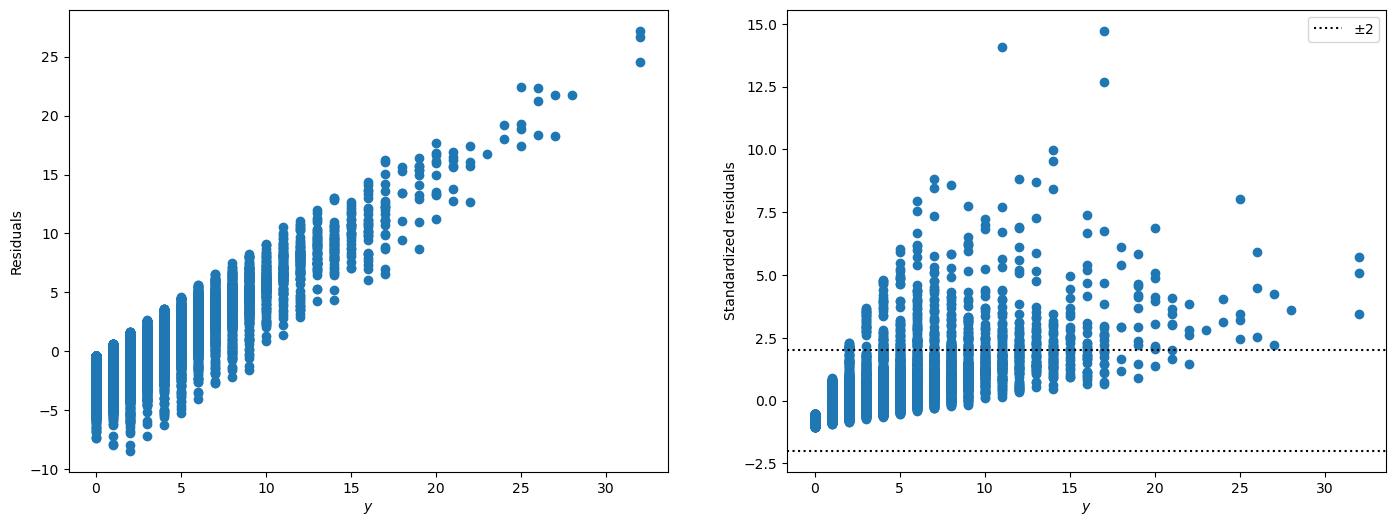

In [50]:
NB_arr = result_NB2.resid_pearson
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(df_part_2_dg['num_accidents'], result_NB2.resid_response, 'o')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(df_part_2_dg['num_accidents'],result_NB2.resid_pearson, 'o')
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [51]:
re = np.array(result_NB2.resid_pearson)
(re<-2).sum() , (re>2).sum()

(0, 552)

In [52]:
re.shape[0]

10000

In [53]:
(552)/10000

0.0552

In [54]:
1-0.0552

0.9448

 <div dir="rtl">
נראה כי הנתונים מתפזרים בתוך התחום של 95% ולכן ההיתפלגות הינה בינומית שלילית

### 8

In [55]:
age = 30
safety_guidence_score = 8
factory__c_Calgery = 0  
factory__c_Montreal = 0  
factory__c_Vancouver = 0  

beta_0 = 0.3220  
beta_1 = -0.0168  
beta_2 = 0.0138  
beta_3 = -0.4788  
beta_4 = -0.4936  
beta_5 = -0.4705  

log_rate = (beta_0 + beta_1 * age + beta_2 * safety_guidence_score + beta_3 * factory__c_Calgery + 
            beta_4 * factory__c_Montreal + beta_5 * factory__c_Vancouver)

rate = np.exp(log_rate)

print(f"Number of accidents per year: {3*rate}")


Number of accidents per year: 2.7927095478657855


### 9

<div dir="rtl">
התשובה שקיבלנו 2.7927095478657855 זה הסיכוי ההסתברותי לתאונה בעבודה לעובד בן 30 שעבד 3 שנים במפעל וקיבל דרגת בטיחות 8

### 10

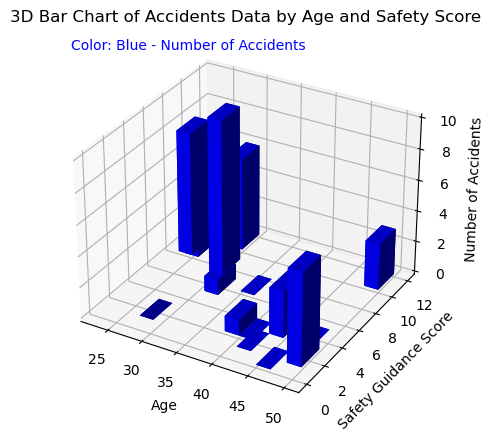

In [56]:
filtered_data = df_part_2_dg[(df_part_2_dg['factory__c_Toronto'] == 1) & 
                             (df_part_2_dg['chemical__c_Methane'] == 1) &
                             (df_part_2_dg['time_in_factory'] <= 5)]

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')

xpos = filtered_data['age']
ypos = filtered_data['safety_guidence_score']
zpos = np.zeros(len(filtered_data))
dx = np.ones(len(filtered_data)) * 2  
dy = np.ones(len(filtered_data)) * 2  
dz = filtered_data['num_accidents']   

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')
ax.text2D(0.05, 0.95, "Color: Blue - Number of Accidents", transform=ax.transAxes, color='blue')

ax.set_xlabel('Age')
ax.set_ylabel('Safety Guidance Score')
ax.set_zlabel('Number of Accidents')


plt.title('3D Bar Chart of Accidents Data by Age and Safety Score')

plt.show()

### 11

 <div dir="rtl">
רגרסיה פואסונית מתאימה לנתוני ספירה שיכולים להיות רק שלמים ואי-שליליים, ולכן היא מגבילה את התחזיות לערכים אלו. חישוב מקדמי המודל ברגרסיה פואסונית נעשה באמצעות שיטות איטרטיביות כמו ניוטון-רפסון  או שיטות גרדיאנט. שיטות אלו דורשות מספר צעדים חוזרים כדי להתכנס לפתרון האופטימלי, מה שעלול להיות ארוך ומסובך יותר בהשוואה לרגרסיה ליניארית.
רגרסיה ליניארית מתאימה לנתונים רציפים שיכולים להיות גם שליליים וגם חיוביים, כלומר אין הגבלה על הטווח של הערכים והם יכולים להיות כל מספר ממשי בין מינוס אינסוף לאינסוף. המודל מניח שהשגיאות מתפלגות נורמלית (גאוסית). 
אחד היתרונות המרכזיים של רגרסיה ליניארית הוא שניתן לחשב את הפרמטרים של המודל באמצעות נוסחה פשוטה ומהירה(שיטת הריבועים הפחותים), הנקראת פתרון סגור. פתרון זה ממזער את סכום ריבועי השגיאות ומוביל לחישובים מהירים ויעילים.

# Good luck!!!